In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset
License(s): copyright-authors
  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 57.5MB/s]


In [ ]:
!ls

diabetes-prediction-dataset.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset = '/content/diabetes-prediction-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

diabetes_prediction_dataset.csv  diabetes-prediction-dataset.zip  kaggle.json  sample_data


In [ ]:
diabetes_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [ ]:
diabetes_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['gender']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diabetes_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded1 = pd.concat([diabetes_data, encoded_df], axis=1)
df_encoded1.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
categorical_columns = ['smoking_history']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(diabetes_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df_encoded2 = pd.concat([diabetes_data, encoded_df], axis=1)
df_encoded2.drop(categorical_columns, axis=1, inplace=True)

In [ ]:
# Get the common columns between df_encoded1, df_encoded2, and diabetes_data
common_columns = set(df_encoded1.columns).intersection(df_encoded2.columns).intersection(diabetes_data.columns)

# Drop common columns from df_encoded2
df_encoded2 = df_encoded2.drop(common_columns, axis=1)

# Concatenate the two encoded datasets along the columns axis
combined_df = pd.concat([df_encoded1, df_encoded2], axis=1)
combined_df.drop('smoking_history', axis=1, inplace=True)
combined_df.drop('gender', axis=1, inplace=True)

In [ ]:
correlation_matrix = combined_df.corr()

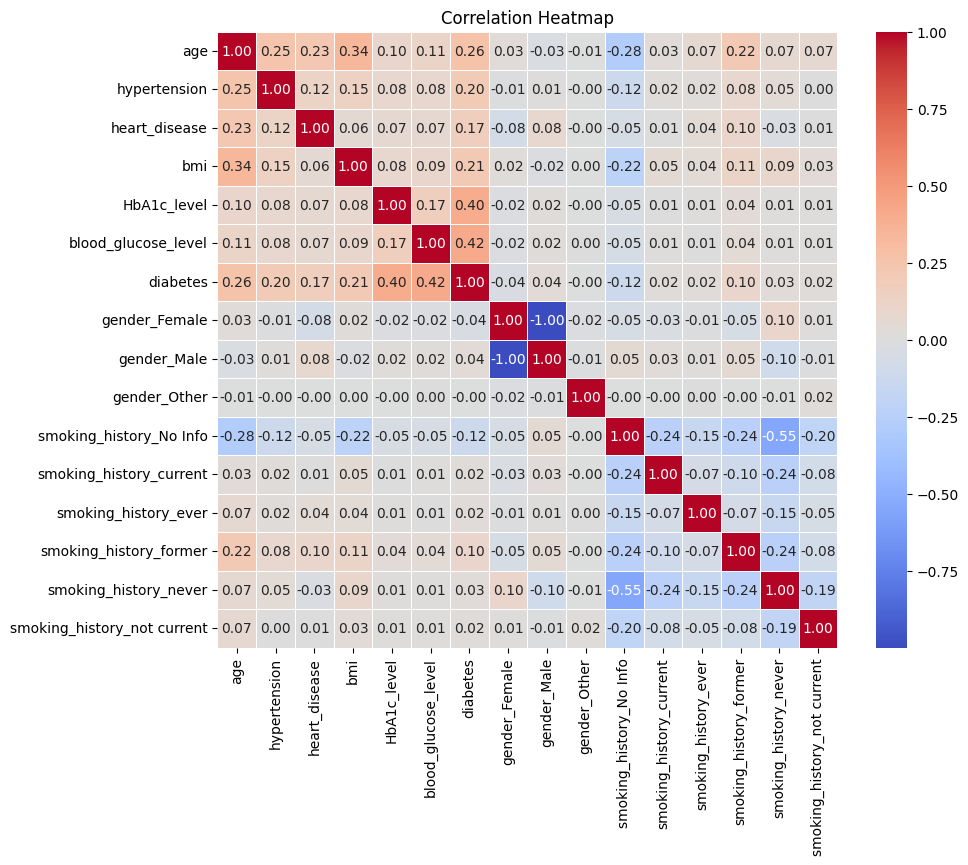

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
correlation_matrix = combined_df.corr()

# Extract the correlation values for the 'diabetes' column
diabetes_correlation = correlation_matrix['diabetes']

# Drop the 'diabetes' column to focus on other variables
correlation_without_diabetes = diabetes_correlation.drop('diabetes')

# Find the most positively correlated variables
most_positively_correlated = correlation_without_diabetes.nlargest(1)

print("Most positively correlated variable with 'diabetes':")
print(most_positively_correlated)

Most positively correlated variable with 'diabetes':
blood_glucose_level    0.419558
Name: diabetes, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = diabetes_data[['age', 'HbA1c_level','diabetes']]
y = diabetes_data['blood_glucose_level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1360.4022355236616
R-squared: 0.1749543154113733


**SVR**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')  # 'rbf' kernel is commonly used for SVR


In [ ]:
model.fit(X_train_scaled, y_train)


KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)


In [ ]:
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1426.2865664898663
R-squared: 0.13499732215874738
